## 🧠 **Perceptrón** 🧠

---
### 📚 1. Introducción

Esta notebook demuestra cómo utilizar el **Perceptrón**, uno de los algoritmos más básicos de aprendizaje supervisado, para clasificar imágenes del conjunto de datos MNIST.

---

### 🛠️ 2. Importación de librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline


---

### 📥 3. Carga del Conjunto de Datos MNIST

El conjunto de datos MNIST contiene 70,000 imágenes de dígitos escritos a mano (60,000 para entrenamiento y 10,000 para prueba). Cada imagen es de 28x28 píxeles en escala de grises.

In [3]:
# Carga del conjunto de datos MNIST
print("Cargando el conjunto de datos MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
print("Datos cargados exitosamente.")

Cargando el conjunto de datos MNIST...
Datos cargados exitosamente.


---

### 🔍 4. Exploración de los Datos

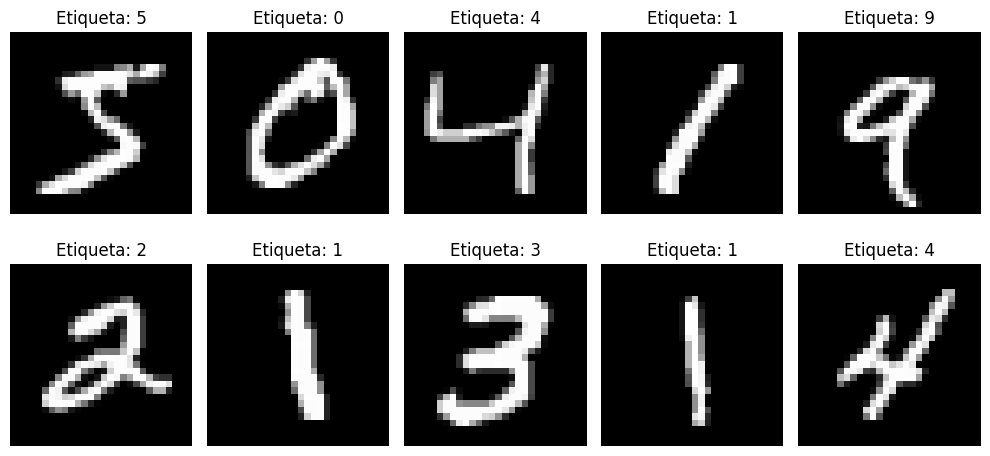

In [4]:
# Visualización de algunas imágenes del conjunto de datos
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Etiqueta: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.savefig("clasificator_num.svg")
plt.show()

---

### 🧹 5. Preprocesamiento de los Datos

El preprocesamiento es una etapa crucial que incluye la **normalización de los datos** y la **división** en conjuntos de entrenamiento y prueba.

In [5]:
# Conversión de etiquetas a enteros
y = y.astype(np.int8)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42
)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 60000 muestras
Conjunto de prueba: 10000 muestras


---

### 🤖 6. Implementación del Perceptrón

Utilizaremos el Perceptrón de la librería `scikit-learn` para entrenar nuestro modelo. Este algoritmo es adecuado para problemas de clasificación binaria, pero con algunas adaptaciones, puede manejar múltiples clases.

In [6]:
# Inicialización del modelo Perceptrón
perceptron = Perceptron(
    max_iter=1000,
    eta0=0.1,
    random_state=42,
    verbose=1
)

---

### 🏋️ 7. Entrenamiento del Modelo

Entrenaremos el modelo utilizando el conjunto de entrenamiento y observaremos el progreso durante el proceso de aprendizaje.

In [7]:
# Entrenamiento del modelo
print("Iniciando el entrenamiento del Perceptrón...")
perceptron.fit(X_train, y_train)
print("Entrenamiento completado.")

Iniciando el entrenamiento del Perceptrón...
-- Epoch 1
Norm: 99.17, NNZs: 716, Bias: -79.700000, T: 60000, Avg. loss: 0.627107
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 106.72, NNZs: 716, Bias: -96.500000, T: 120000, Avg. loss: 0.516409
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 108.34, NNZs: 716, Bias: -107.700000, T: 180000, Avg. loss: 0.439680
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 110.82, NNZs: 716, Bias: -116.600000, T: 240000, Avg. loss: 0.413032
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 118.48, NNZs: 716, Bias: -123.900000, T: 300000, Avg. loss: 0.446425
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 120.01, NNZs: 716, Bias: -130.400000, T: 360000, Avg. loss: 0.390127
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 126.25, NNZs: 716, Bias: -134.900000, T: 420000, Avg. loss: 0.390778
Total training time: 0.84 seconds.
-- Epoch 8
Norm: 127.65, NNZs: 716, Bias: -140.500000, T: 480000, Avg. loss: 0.404568
Total training time: 0.97 

---

### 📈 8. Evaluación del Modelo

Después del entrenamiento, evaluaremos el rendimiento del modelo en el conjunto de prueba utilizando métricas como la exactitud, y el reporte de clasificación.

Exactitud del modelo: 87.52%


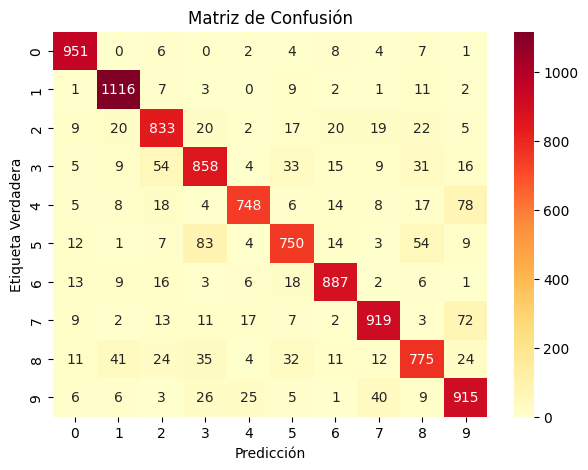

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       983
           1       0.92      0.97      0.94      1152
           2       0.85      0.86      0.86       967
           3       0.82      0.83      0.83      1034
           4       0.92      0.83      0.87       906
           5       0.85      0.80      0.83       937
           6       0.91      0.92      0.92       961
           7       0.90      0.87      0.89      1055
           8       0.83      0.80      0.81       969
           9       0.81      0.88      0.85      1036

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.87     10000



In [9]:
# Predicciones en el conjunto de prueba
y_pred = perceptron.predict(X_test)

# Cálculo de la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")

# Matriz de confusión con descripción numérica y colormap mejorado
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=range(10), yticklabels=range(10))
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.savefig("confusion_matrix_clasificator_num.svg")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


---

### 📝 10. Conclusión

En esta notebook, hemos implementado un Perceptrón para la clasificación de imágenes utilizando el conjunto de datos MNIST. Aunque el Perceptrón es un algoritmo simple y su rendimiento puede no ser tan alto como modelos más avanzados, aún es un modelo con grandes beneficios educativos.

Para mejorar el rendimiento, podrías explorar algoritmos más complejos, ajustar hiperparámetros o utilizar técnicas de ingeniería de características adicionales.